<a href="https://colab.research.google.com/github/everval/AAU_AOM/blob/master/Exercises_Lecture2_after.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises Probability Distributions and the Central Limit Theorem 

We start by loading the required packages.

In [ ]:
import numpy as np #Package for numerical multidimensional tables
import pandas as pd #Package for data frames
import matplotlib.pyplot as plt #Package for plots and graphs
import random as rnd #Package for random number generation
from scipy.stats import norm #Import the Normal distribution from the scipy.stats package
from scipy.stats import binom  #Importing the binomial distribution

## 1

In the lecture we analyzed the effect that a change on the mean or the location parameter has on the Normal distribution.

Now you are going to analyze the effect of a change on the standard deviation or scale parameter.

Plot the pdf for $N(0,1),N(0,0.5),N(0,2),N(0,3)$

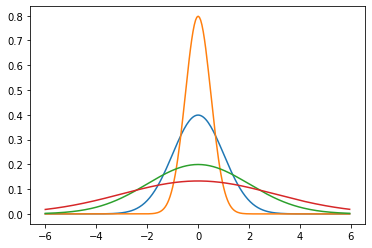

In [ ]:
new_vals = list(np.arange(-6,6,0.05))  #New grid
val_sigs = [1, 0.5, 2, 3]    #Different location parameters

for i in range(0,4):
    plt.plot(new_vals,norm.pdf(new_vals,loc=0,scale=val_sigs[i])) #A plot for each location parameter

plt.show()

## 2

Let $X\sim N(0,1)$ and $Y\sim N(1,1.5)$. Compute the following probabilities:

*   $P(-1<X<1)$
*   $P(X>-1)$
*   $P(-1<Y<1)$
*   $P(Y<0)$


In [ ]:
mux = 0
sigx = 1
muy = 1
sigy = 1.5

display(norm.cdf(1,loc=mux,scale=sigx)-norm.cdf(-1,loc=mux,scale=sigx))
display(1-norm.cdf(-1,loc=mux,scale=sigx))
display(norm.cdf(1,loc=muy,scale=sigy)-norm.cdf(-1,loc=muy,scale=sigy))
display(norm.cdf(0,loc=muy,scale=sigy))

0.6826894921370859

0.8413447460685429

0.4087887802741321

0.2524925375469229

## 3
Follow the steps below to show the CLT at work on samples from a binomial distribution.



1.  Create an empty list to store the sample means
2.  In a *for* loop:
    *   Generate at least 1000 samples of size 100 of a binomial distribution $B(30,0.1)$. 
    *   Compute the sample mean and append it to the sample means list.
3.  Compute the mean and standard deviation of your list of sample means generated in the for loop.
4.  Plot the histogram of your sample means list. Remember the *density* option.
5.  Add the plot of the Normal pdf with mean and standard deviation obtained in 3. 

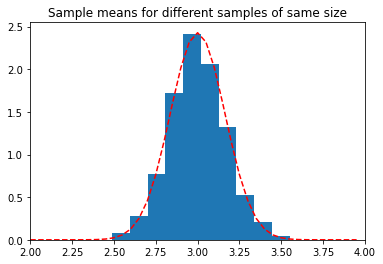

In [ ]:
xbars = []
N = 100     #Size of the sample
n = 1000    #Number of samples

for i in range(0,n):
  this_sample = binom.rvs(30,0.1,size=N)
  xbars.append(np.mean(this_sample))

plt.hist(xbars,bins=10,density=True)
plt.title('Sample means for different samples of same size')

mean_xbars = 30*0.1  #The theoretical mean (that we know in this case)
std_xbars = np.sqrt(30*0.1*0.9)/np.sqrt(N) #The theoretical standard deviation (that we know), divided by square of sample size
vals = np.arange(mean_xbars-1,mean_xbars+1,0.05)  #Making a new grid
nor_vals = norm.pdf(vals,loc=mean_xbars,scale=std_xbars) #Evaluating the Normal

plt.plot(vals,nor_vals,color="red",linestyle="--") #Adding the theoretical density
plt.xlim(mean_xbars-1,mean_xbars+1)
plt.show()

## 4
In the last exercise, does the overall mean computed in step 3 of the for loop coincide with the theoretical mean?

Using the distribution obtained from the CLT in the exercise above, obtain the probability that the overall mean computed in step 3 of the loop is greater than the theoretical mean.


In [ ]:
display(mean_xbars)

display(1-norm.cdf(3,loc=3,scale=30*0.1*0.9/np.sqrt(100)))

3.0

0.5

## 5

Using the CLT, obtain the distribution for the sample mean of Family Guy's ratings.


Using the distribution obtained above, compute the probability that the sample mean for all Simpsons' ratings is above the sample mean for all Family Guy's ratings.

N(mean family guy, std family guy/sqrt(sample size))

In [ ]:
from google.colab import files
uploaded = files.upload()

fm = pd.read_csv('FamilyGuy_ratings.csv')

Saving FamilyGuy_ratings.csv to FamilyGuy_ratings.csv


In [ ]:
fm_mean = np.mean(fm['Rating'])
fm_std = np.std(fm['Rating'])

display([fm_mean,fm_std/np.sqrt(369)])

display(1-norm.cdf(7.197446808510636,loc=fm_mean,scale=fm_std/np.sqrt(369)))

[7.171815718157177, 0.03298080528800113]

0.21853462431080906

## 6

Replicate our Monte Carlo simulation from the lecture for the Family Guy's ratings instead of the Simpsons.

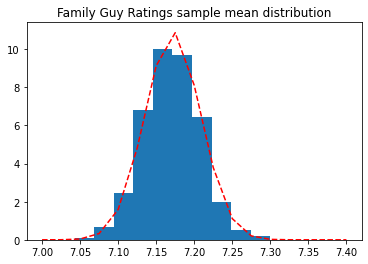

In [ ]:
samsize = 300 #Sample size
numsam = 1000  #Number of samples

fm_means = []

for i in range(0,numsam):
  this_sample = fm['Rating'].sample(n=samsize,replace=True)
  fm_means.append(np.mean(this_sample))

plt.hist(fm_means, bins=10, density=True) #Creating the histogram of the random sample
                                        #We make the option density true so the bins sum to 1
plt.title('Family Guy Ratings sample mean distribution')

mean_all = fm_mean
std_other = fm_std/np.sqrt(300)
vals = np.arange(7,7.4,0.025)
nor_vals = norm.pdf(vals,loc=mean_all,scale=std_other) #Evaluating the Normal

plt.plot(vals,nor_vals,color="red",linestyle="--") #Adding the theoretical density
plt.show()